In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# CSV dosyasını yükle
df = pd.read_csv("diabetes_data_upload.csv")  # Senin dosyan farklıysa ismini yazabilirsin

df = pd.read_csv("diabetes_data_upload.csv")  # dosya adını kendine göre değiştir
# Yes/No gibi string ifadeleri sayısala çeviriyoruz
df = df.replace({'Yes': 1, 'No': 0})
df = df.replace({'Male': 1, 'Female': 0})
df = df.replace({'Positive': 1, 'Negative': 0})
df.head()

<ipython-input-2-e3f1f0477bcd>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0})
<ipython-input-2-e3f1f0477bcd>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Male': 1, 'Female': 0})
<ipython-input-2-e3f1f0477bcd>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [3]:
df = df.drop(['sudden weight loss'], axis=1)


In [4]:
X = df.drop("class", axis=1)   # class = hedef sütun
y = df["class"]                # hedef değişken

In [5]:
X = df.drop("class", axis=1)   # class = hedef sütun
y = df["class"]                # hedef değişken

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
from sklearn.linear_model import LinearRegression

# Linear Regression modelini oluştur
model = LinearRegression()
# Modeli eğitim verisiyle eğit (fit et)
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Test verisiyle tahmin yap
y_pred = model.predict(X_test)



In [9]:
# Modelin tahminlerini alıyoruz
y_pred = model.predict(X_test)

# Olasılıkları 0.5 eşik değeri ile sınıflara dönüştürün (regresyon çıkışı 0 veya 1'e dönüştürülür)
y_pred_class = (y_pred > 0.5).astype(int)

# Confusion Matrix'i oluşturun
cm = confusion_matrix(y_test, y_pred_class)


In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Ortalama kare hatası (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# R-kare skoru (Modelin başarı oranı)
r2 = r2_score(y_test, y_pred)

print("Ortalama Kare Hatası (MSE):", mse)
print("R-Kare Skoru:", r2)


Ortalama Kare Hatası (MSE): 0.08574037956792722
R-Kare Skoru: 0.6041963527927013


# Lineer algororithmasini denedim basari orani 58% bu dusuk oldugu icin gereksiz columleri cakirttarak yukseltmeye calisalim


'sudden weight loss' columbi cikartik ve basari oraninde 4% buyume gorduk ama bu bizim bekledigimiz bir basari orani olmadigi icin farkli algoritmalar deniycez

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Modeli oluştur ve eğit
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Test verisi ile tahmin yap
y_pred = model.predict(X_test)

# Başarı metriklerini yazdır
print(" Doğruluk Oranı (Accuracy):", accuracy_score(y_test, y_pred))
print("\n Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print("\n Karışıklık Matrisi:\n", confusion_matrix(y_test, y_pred))


 Doğruluk Oranı (Accuracy): 0.9230769230769231

 Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104


 Karışıklık Matrisi:
 [[28  5]
 [ 3 68]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
import matplotlib.pyplot as plt

r2_before = 0.58  # sütun çıkarmadan önceki başarı
r2_after = 0.65   # sütun çıkardıktan sonraki başarı


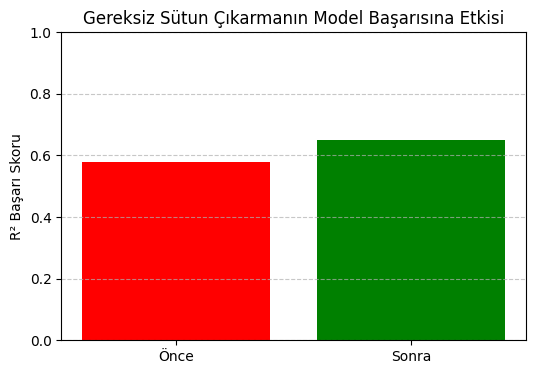

In [13]:
plt.figure(figsize=(6, 4))
plt.bar(['Önce', 'Sonra'], [r2_before, r2_after], color=['red', 'green'])
plt.ylim(0, 1)
plt.ylabel("R² Başarı Skoru")
plt.title("Gereksiz Sütun Çıkarmanın Model Başarısına Etkisi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [14]:

# Test verisi ile tahmin yap
y_pred = model.predict(X_test)


bu graf cikardiktan sonra aldigimiz sonuc karsilatirma grafi

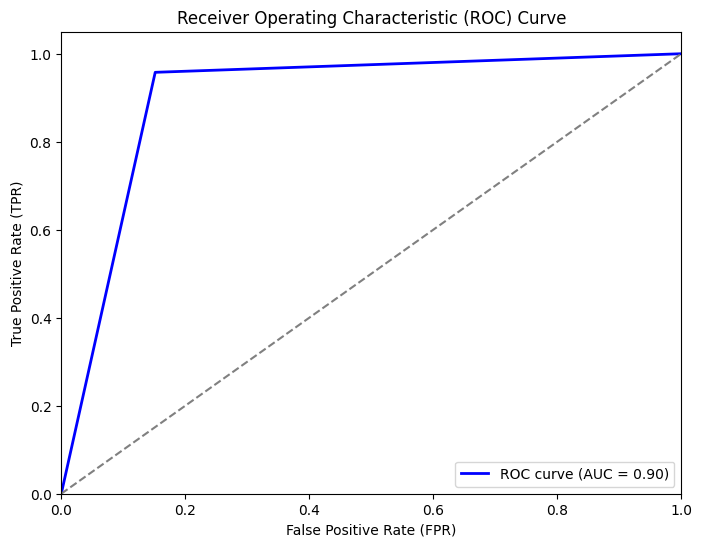

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Modelin tahminlerini al
y_pred = model.predict(X_test)

# Regresyon çıktısını 0 ve 1 sınıflarına dönüştür
y_pred_class = (y_pred > 0.5).astype(int)

# FPR ve TPR'yi hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# AUC'yi hesapla
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random model için diagonal çizgi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
